In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('clean_tweets.csv')

In [3]:
df.head()

Unnamed: 0  sentiment                                               text
0           0          0  awww that s a bummer you shoulda got david car...
1           1          0  is upset that he can not update his facebook b...
2           2          0  i dived many times for the ball managed to sav...
3           3          0     my whole body feels itchy and like its on fire
4           4          0  no it s not behaving at all i m mad why am i h...

In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [5]:
df.describe()

sentiment
count  1.600000e+06
mean   2.000000e+00
std    2.000001e+00
min    0.000000e+00
25%    0.000000e+00
50%    2.000000e+00
75%    4.000000e+00
max    4.000000e+00

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
sentiment    1600000 non-null int64
text         1596714 non-null object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [6]:
df[df['text'].isnull()].count()

sentiment    3286
text            0
dtype: int64

In [8]:
cols = ['sentiment', 'id', 'date', 'query_string', 'user', 'text']
df2 = pd.read_csv('training.1600000.processed.noemoticon.csv', header=None, names=cols)

In [9]:
df2.iloc[df[df['text'].isnull()].index].head()

sentiment          id                          date query_string  \
208           0  1467863072  Mon Apr 06 22:33:25 PDT 2009     NO_QUERY   
249           0  1467874569  Mon Apr 06 22:36:27 PDT 2009     NO_QUERY   
398           0  1467912842  Mon Apr 06 22:46:53 PDT 2009     NO_QUERY   
430           0  1467919452  Mon Apr 06 22:48:48 PDT 2009     NO_QUERY   
1011          0  1468061127  Mon Apr 06 23:30:23 PDT 2009     NO_QUERY   

              user            text  
208       Artiel87      @mandayyy   
249       Artiel87    @mandayyy     
398   KimberlyKane  @danadearmond   
430      jtmal0723      @anistorm   
1011    gabysslave  @citizensheep

Hence, because of data cleaning, some tweets now have NULL values. This is because those tweets comprised only of mentions or url links. Hence, these Null values must be dropped.

In [10]:
df.dropna(inplace=True)

In [11]:
df['sentiment'] = df['sentiment'].map({0:0,4:1})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596714 entries, 0 to 1599999
Data columns (total 2 columns):
sentiment    1596714 non-null int64
text         1596714 non-null object
dtypes: int64(1), object(1)
memory usage: 36.5+ MB


# Text Visualisation

### Word Cloud

In [13]:
from wordcloud import WordCloud, STOPWORDS

In [14]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='black', stopwords=stopwords, 
                      max_font_size=40, random_state=42).generate(str(df['text']))

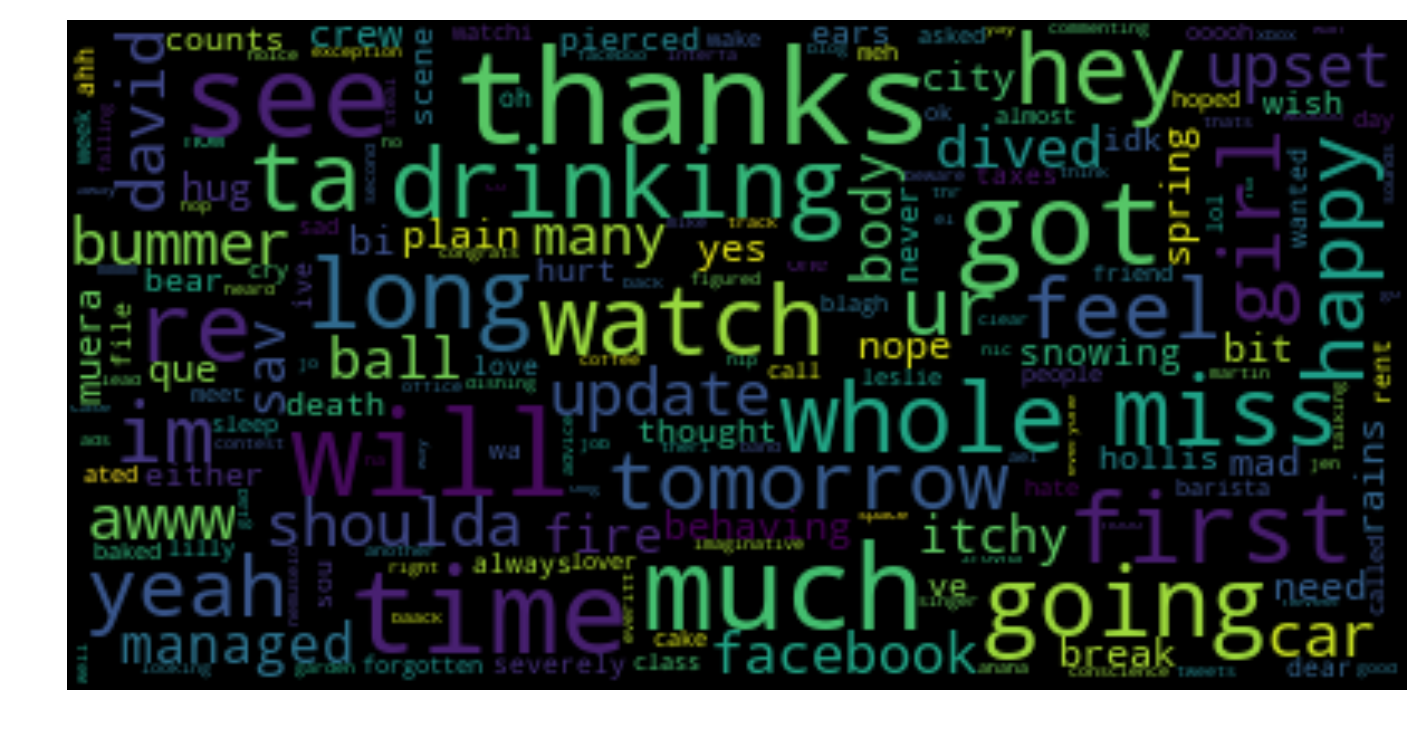

In [15]:
fig = plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

This word cloud consists of the words which have the highest frequency among all the tweets, positive and negative both.

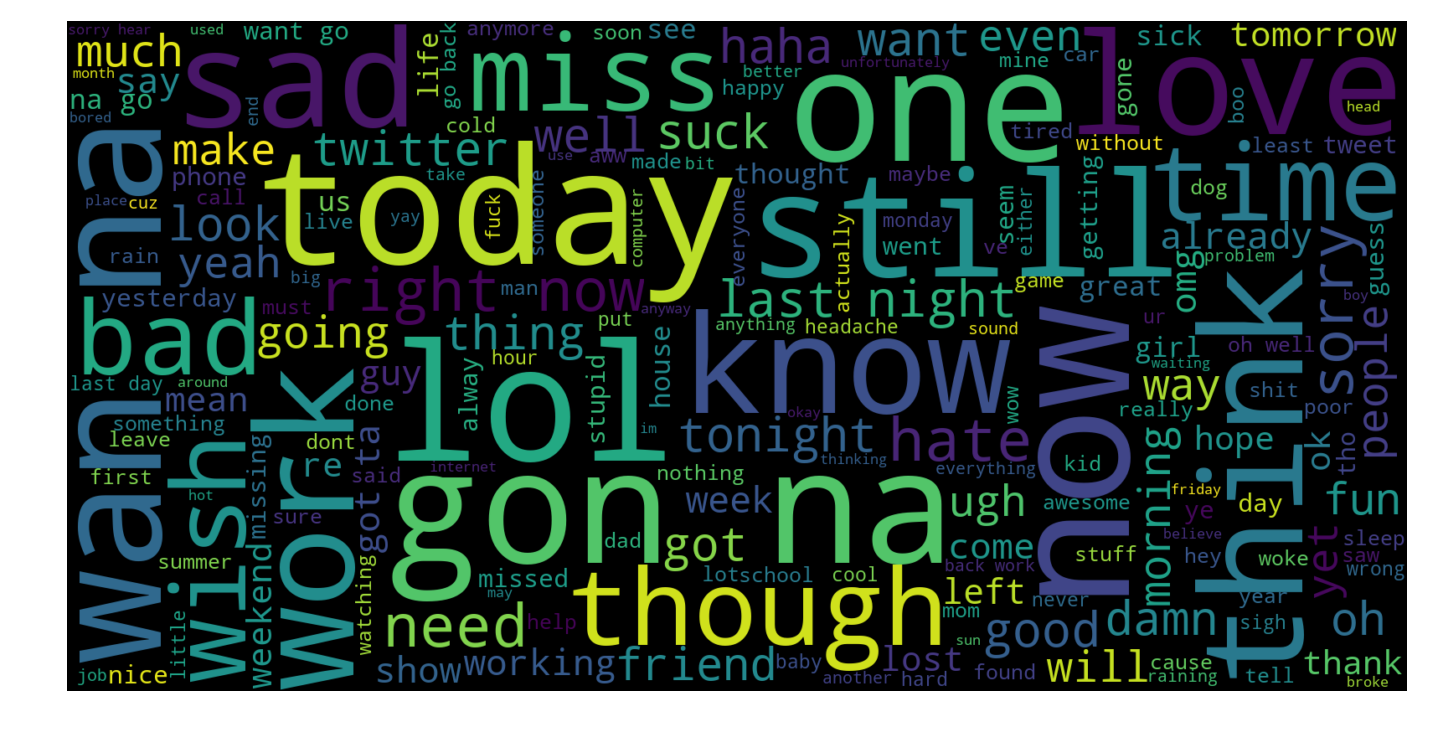

In [16]:
negative_tweets = df[df['sentiment']==0]

neg_tweet = []
for tweet in negative_tweets.text:
    neg_tweet.append(tweet)
neg_tweet = pd.Series(neg_tweet).str.cat(sep = ' ')

neg_wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_tweet)
plt.figure(figsize=(12,10))
plt.imshow(neg_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Some words, like, "today", "one", "still" can be termed as neutral. Words like, "sad", "bad", "hate", "suck", "wish" etc. make sense as negative words.

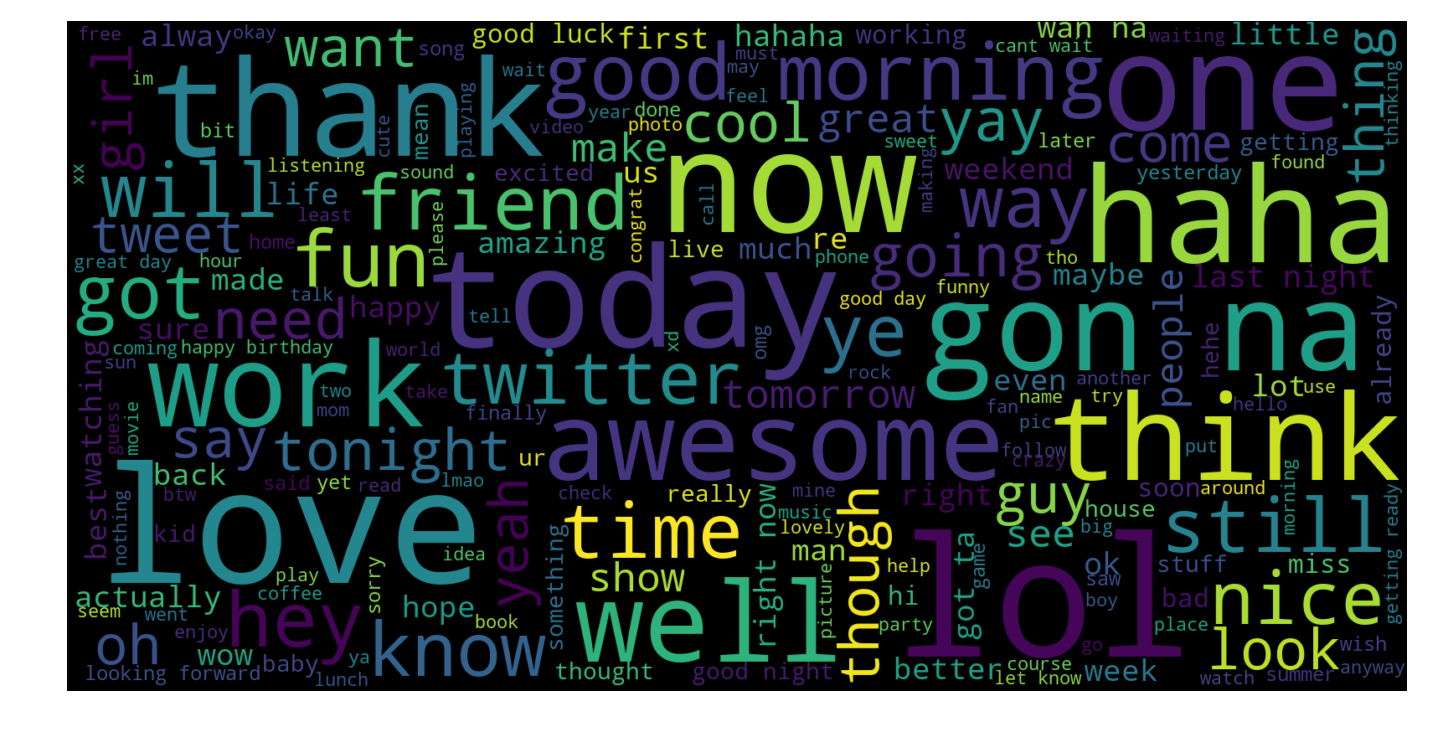

In [17]:
positive_tweets = df[df['sentiment']==1]

pos_tweet = []
for tweet in positive_tweets.text:
    pos_tweet.append(tweet)
pos_tweet = pd.Series(pos_tweet).str.cat(sep = ' ')

pos_wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(pos_tweet)
plt.figure(figsize=(12,10))
plt.imshow(pos_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In this wordcloud of positive tweets, neutral words, like "today", "tonight", "still", etc are present. Also, words like "thank", "haha", "awesome", "good", etc stand out as the positive words.

Words like "today", "lol", "tonight", "still", "work" etc are common in both the positive and negative tweets. Hence, it can be concluded that people have both positive and negative response towards work and their day.

What I found surprising is the presence of "lol" and "love" in both the positive and the negative tweets wordclouds. So, now, I am going to inspect this.

In [18]:
count = 0
for tweet in negative_tweets.text:
    if 'love' in tweet:
        print(tweet)
        count = count + 1

ahh ive always wanted to see rent love the soundtrack
meh almost lover is the exception this track gets me depressed every time
awe i love you too am here i miss you
damn the grind is inspirational and saddening at the same time do not want you to stop cuz i like what u do much love
i m missing you babe but as long as your alive i m happy ya i m tired my love imma try to sleep hopefully you had a headstart
love the french i tell people here in the south i m qtr french and they snarl at me french are beautiful people
ooh i m excited and not even going be there long love youtube
i m here friend and i love you
i wish i was sold out if you have some time let me know i would love to hear more about what you are up to
i love you buck
is in love with scrappy and is missin him already
glad i was able help you feel better i hate to see you sick love you
i love my atekinzz so much i soo miss her
stupid arranged marriages i ll convert so you can marry me love you
fuck omg austins always there tho

wish i had plans no blackberry no plans got some lovely tuna though mmmm yummy
slept like a log until the phone rang times in an hour waiting to hear from my love
i think i cracked my knuckle only dumb asses box with loose wraps and no gloves
nawww i m in love with john barrowman this show never fails to make me cryy with the sad stories
lol i loved our nsync session last night haha i love you sam you are fucking amazing feel better muah boo work
rockworld last night was awesome but lost my lovely tattoo necklace can not wait for rocktober th
never wanted to go home this bad in my entire life i love it here but hate that its my only option i miss nj
amberlovely though im sared this announcment will mean there wont be gigs for a while
okay so i love you alot but im obsessed with peanut butter i think thats a problem i still love you anyways haha
i love this picture i want to go back
it s a shame that everything has to end at some point i really love south of nowhere best girl to girl dr

i m really missing my better half i love him sooooo much i really wish i could hug him right now
have fun in la way jealous would so love to be there i could be y alls assitant lol
i love how a cup of coffee cures my headaches i hate how the lack of coffee causes them
nice day and iam still looking for my love
a not as much as u love sam though stay happy i dont ever wan na see u cry it breaks my heart
memoria i m reading the selena article and it s sad how pessimistic she is the part about how dh believes in love and fairy tale stuff
i love my cats
aight i m going to go chill w my love finishing up this bottle then bed goodnight twitterville hope your night is better than mine
me i have a problem it s called love
love sick yeah i think so
my car is ruined what a lovely saturday night
ur welcome yeh i love watching hannah montana still waiting for the movie to come out here in australia
renee i miss you love muffin
sorry my loves but i have been in a hard place recently laptop s out of

loves florida but misses her american friends
i love how nice the weather is today and i am camping tonight oh and i hate my hair
altona wogs gota love em all i can smell is awsome food and makes me hungry
little beetle not feeling any love searches are bring up zilch bar peeps that appear funny
happy birthday dork lots of love for you today i wish i was there so i could buy you a drink make it a great night
i love her too she shouldve won
wants her boo btw love fhnixon s posts hilarious
noo i do not wan na leave i love it here
love you loads hun hot weather gutted i aint with you now chillaxing but we got tomoz xxxx
at starbucks with my love eff school i have work later too
looks like we re on the exact same track nothing worse than not being able to fix things for someone you love
ah yes dropping the bear thing it s such a lovely day here very odd for stafford
had a lovely day yesterday the weather was great now stupid slapton
watching midsomer murders totally in love with this show 

ohh no i loved him
im gon na miss you you got ta find a way love you night debs gon na miss you xxxxxxxxxxxxxxx
loves that he can get gps satellites on his phone and a ft location fix on his phone but spotty edge data
collier i d love to know another person that likes blink there related bands in the same way i do my school is a chav festival
sorry hun i did not mean to sound a dick babe love you x
i will try if not il get it during the week il miss you too loveyoubeth xxxx
i know u are damn driver prolly brought u virginia beach da verizon wireless amphitheatre i m sorry va loves u tho
i love you jose rachel
yesh i love niley but if miley s happy we shud be dont hate guys im sure miley doesnt want this just save ur crap hehe x
my mom would have loved this place kokopelli mexican cantina
song of my life now your love is a lie simple plan beautifulylost
who has an old workingipod lying around that they are no longer using i d love to borrow it as neither of mine are in working order
mcf

you are the best i love you can you give me your e mail i want to write with you but i cant
you are the best i love you can you give me your e mail i want to write with you but i cant
you are the best i love you can you give me your e mail i want to write with you but i cant
you are the best i love you can you give me your e mail i want to write with you but i cant
you are the best i love you can you give me your e mail i want to write with you but i cant
you are the best i love you can you give me your e mail i want to write with you but i cant
gave rafa a walk did not see him today hmph anyway watching tv i am now inlove with korean shows turned tagalog haha
you are the best i love you can you give me your e mail i want to write with you but i cant
you are the best i love you can you give me your e mail i want to write with you but i cant
i love that book but it slid off my desk and fell down the back of the radiator and now i can not get it out devastated
you are the best i love you

just heard about the festival on the radio this am my one regret is that the love of my life mos def is only playing la
i saw them there in november it s a small venue i loved it can not make it this time around though
sorry you are not feeling well i m sure there s a blockhead or around that would love to help u feel better
i love that you went to bed hours before i woke up fml
i love you in hollyoaks and wish you were staying are you gon na come back im gon na miss seeing you at half x x
you never realize how much you truly care love someone until they are gone
damn y all love some waffle house damn now i want waffles too
worst part is i love to write if i m not trying i ll be able to think but my creativity is in an enclosed bubble right now
i love him to bits but as i asid earlier no nonononononono
i love playing sims but now sims hates me and does not work
ur my everythin i hate to say this chris but i dnt love u im sorry
i want some chicken salad i love you
awwh i love the film a

watching do the right thing they just killed radio raheem love spike lee
dawn i love you follow me
dang i have not updated in a while i love andre and miss him soo soo much he s in colorado ugh and i m lonely this sux
sorry i suck with faces and i loved your performance prior to realising i knew you which means it was unbiased
i love zach seth jake hey why am i the only one whose name is not letters
leonard i love you so much and i hope you can love me even if i can not go to florida i still want to but i do not know
simple girl thanks love i ve been dying to see it stupid technological difficulties
i love you so much
hugz all nite mama even though you do not love my hugs when we in conf
ready to have some fun i really love him but how do you keep loving someone who does not show it back
loves the new hero rom but hates how slow it is to change in and out of rosie what to do what to do
reznor this is getting way too high school soap opera i love you man but i m really thinking about mu

i love funny commercials too bad all the commercials in malaysia are plain boring people try to avoid commercials here for gods sake
gah i love developing with firefox firebug but it sucks that it s such an unstable environment right now new profile here i come
u can c my son was gr but he will not draw any more trying to get him back send me pics of ur s i love childrens art
i m so in love with you till the point of madness
great they love to keep us in suspense dancers on stage now doing cool hip hop dance where s the phone samsung
i can not believe new kids on the block treated us this way good bye nkotb this love affair is over
i miss it too hope to talk to ya sooooner bye loveya xoxox
what a lovely sunny day in london shame i have to work
lovely weekend found out i must postpone my kenya travels do to filming good luck in the world cup qualifier mister
has sun burn after a lovely day in the sun with her boys monkey didnt want to comw
i want to find love too jonny yet not a lot of 

help plz chosen bedspread for future apartment is out of stock am i crazy to buy it off ebay because it s so lovely and i m indecisive
church but thats about it we have never talked b it was love at first sight his name is sullivan and he is about my age
but i soooo love this song i can not help it ha and i can hit enter to reply nice
love decisions are definitely the toughest
falling in love tapi nasib dengerin dia curhat tentang tu cewe terus
in love lauren i miss you sadness wish i could skype working at am just does not work for me
omg we are totally out of sight soundtrack dramatic is sad is not it we used to be pure love and friendship
win whats wrong love
i soooo want to see your june show at harlot in sf im not having much luck though love ya
yeah i was shocked they did since they r totally anti jonas but i guess they realized i m gon na love them no matter what
i would love to try menchies but they dont have one in indiana
i m loving the new cd just cause valeria send it to me

eric i said hickups i love you sorry i m in a crack head mood it sucks when your friend is at work
i love my g phone sorry iphone you still win for ipod and better battery life but for everything else even with yr new update
i need to kick the diet soda habit too need the caffeine though and i really love the taste bookieb
hi twitter world i m sad reproved chemiical i will miss but i love u so much everyone bless u guys peace love jonass take care
if anybody see a princess called jess say it that i miss her lovee n i losin my mind without she i need she i cant breathe jess miss ya
eres una espia i love u girl and i miss u too
your missing someone hmmm oh yeah me lol nah have fun my love and be safe sweetie lol
aw that girl that did the robot dance got kicked off i still love that they re using already gone for the kick off i love that song
what do you do when the one you love leaves im gon na miss corey
yes yes everyone loves bestest of all
we have those too i love them though i have n

i have been having really bad dreams lately not just scary but like past things that i would love to forget about are haunting me
i m staying here without u without ur love and without ur hug
manford a i love board games and instead i m stuck in writing bloody end of year reports for kids have fun
my girlfriend stays up late and barely talks to me anymore wonderfull i love my life
u know we love you too p s can u send some sunshine to the east coast days of rain
i hate june gloom it makes me so sad i love the sun
i love you babe happy th monthaversary wish we were together miss youuuu
i d love to
i hope you re doing ok really looking forward to hearing from you i love you miss you xo
bear grylls just ate a tarantula i do not know if i can still love him after that
i would trade a beautifully cleaned for a dirty house with all my lovelies any day this is it
dang how i wish i had my bestfriend there with me like lsb ohwell i have really good girlfriends awesome r girlfriends loves tmr
my

i loveee it when u smack my ass missash dont move
and my dad s diabetic so that song is close to my heart lines vines and trying times can not choose i love the entire album kk done
i m crying so hard i really hope she is not sick she s my best friend i love her
how fun wish i could come down i love watching the crazy monkeys that swing around
i wish to be someones whole world and for them to tell me they love me things i can only wish for unfortunately
no weird cravings yet though mom does not seem to like ethnic food much anymore which is a bummer because i love asian food
shit i m so sorry samia i love you
the brotherhood has lost another kuvasz lover this week
just got back from the hospital rip steven love ya
my finger hurts but on the brightside i love sleeping on new sheets and new comforter work in the am booo
yeah i m really upset the old one was so lovely maybe they ll realize they are making a mistake
hungrygirl ooh i love their hot dogs now i want one too
lovee lol do u thi

In [19]:
count

21548

Hence, there are 21.5k negative tweets where the word 'love' is used. But one thing I observed is that love is used with negative words like sad, loss, no, leave, etc or it is used sarcastically.

In [20]:
count = 0
for tweet in positive_tweets.text:
    if 'lol' in tweet:
        print(tweet)
        count = count + 1

make sure you dm me if you post a link to that video lol so i do not miss it better get permission and blessing first
yayyy lol i just requested herrr what did she say
they are so serious too while singing like whoa hehe lsd maybe j k lolol
my brother is sick too lol quite weird
am i the first one to tell you you tweet the most while drinking lol
lol you re so fucking funny
im getting nervous that this trip tomorrow may be a little boring haha oh well i always have my trusty ipod and my books of course lol
one sixty six in bowling holy shit lol
just got home from school meant to be getting my hair cut but i cbf lol dancing soon
lol you counted times yeah it was a drag today was not sure if my tweets were going out seems to behave now though
heyyyyyy want to hook it up lol
lol esp when your updates hit my phone
lol not yet my brutha from anotha mutha
hum nice lol take something lol yeah party over there haha u kno them drunk ass s will i b seeing you janets party
if you are at paragon p

lol monty python great sketch
flylady ds has now surfaced did whb yesterday am fighting paper tiger this morning and winning lol setting timer for another min
lol can you write at all
h lol i ll send a few of each different types should go out today
went to city day spent more than half day lost lol now watchin biggest looser
back from math class there alone lol had a swim right after skool now i m enjoying afternoon sushi is ib rlly suppose be ths nice
lol i know still early days but all good so far
thanks for bursting my bubble lol
blah where twiitter laura rampaging lol today was defo thumbs up
lol mannn i cant wait for the new record its gon na be epic
the funny ness is a side effect from the heat lol i m cracking up over here
what a cruel joke lol i think the next record you make should be a christmas album that would be super sweet
haha lol will do
shann s videos are so weird lol but nice
lol abt the cat i m glad you re enjoying the wip
lol im still up and i have to be at work at

manny pacquiao was victorious again i see dollar signs on his face lol
hernandez lol nw look whos da optimist with all da answers ggod job tiger thnk u
runn lol its the best way cuz it gets quieter when its due to close
do you know you re the only person that calls me that lol but im nosy but i am bout to read twilight series again
i ll hang around maccas more often lol
hmm i am trying to wash permanent marker off my body lol
about cook bbl in the mean time go to youtube and check out my first mini movie lol theonearmedgamer until t
nasty falling you ever seen lol at this video
damn sounds boring lol
just got back from seeing nick that was fun p lol but shit party last night soo boring haha but whatever
being able to meet george sampson will be amazing even if im not mean to i will lol girls hav got past the security before hehehehe x
lol i am glad someone enjoys them i like yours too girly
yeah were are lol i m going next sunday so a week today im well excited aha xx
first email into 

if i ran the mile to mcdonalds and ran the mile back would that burn off a double sausage and egg mcmuffin lol
yeaa i know she is smartier then that plus she knows the real thing is better lol
yeah i m okay been icing and ace bandage and sitting on my on twitter lol thanks
lol leave a kid on internet and the kid will do stupid things
alright i think it s time for bed even though i ll probably surf the net for another hour before i go to sleep lol goodnight
so ur moomie liked the pandora you can buy me one next lol
lol birmingham was my st love but it s time to move on good morning
i was just at geno s hrs ago would have went to pats but the neon lights got me lol had drinks at south philly bar too
lol me too
hence the smiley face ha ha ha ha lol yeah i m hong to be tired as fuck tomorrow but guess what i do not care
lol i liked the log ride reference but all i think about when i think of that ride is how wet you get
it ll probably come out like i m drunk or something i ll be so nervous

thank you i will sure hope for some dreams melts lol night sweetie
lol we re watching the same thing again
lol we both know what wine does to you lol could be interesting
we both shud be sleep long day haha big fun lol you have fun were you go
i may drift n a second its cool i have the aromatheraphy candles going wonderful thoughts lol
i herd princess on the radio today and screamed lol cause that was like the first time i have herd it ily x
yes i am intrigued too this twitter can cause so many people pain lol
good morning how r u today lol i want bac to brasil but i can not
good luck today hope tom is not mean lol
christiancuero should of ditched steven for nancy rocha miranda lol
when are they you will champ tell me your team and yeah it s so lively lol i would not mind dressing up for it
congratulations to your winning the league i ve been insanely happy for the last hours with our win yes even in sleep lol
lol bottles of water on the wall bottles of water take one down and pass it 

lol yes we should be thankful but also mindful
night nite world till tomra maybe lol wqat can i say you just never know
hey you seeing clearly yet lol nah twas great c u on sat
its k but you promise this tym lol but do you remember me you said you liked my namee it was like bindii irwin
great feedback pyt jusy came by for coffee and complimented me again as well what is the recipe for this success formula lol
lol i can not even look too busy to get distracted by what seems a little bit addictive
lol now i m wishing i had a spa bath that sounded like such a good option
lol you already know hello
fisher i think not you are unique lol
lol haha hello katyy liking twitter see you tomorrow
noooo i do not think so abl abs means only pain in the brain mental pain lol abl abs is also known as ablative absolute
it so sad knowing that ur no longer in nap lol we miss u come back
lol does not live in the states he s doing a movie and some interviews i think
lol definitely would take the crazy beard

misssssingg my seniors only more weeks for me lol
lol that s great marlon i ve often wondered the same thing
lol i liked it better when i thought you guys had tourettes though not gon na lie
yea yea thanks lol i wish it was at least a cool one
lol tying em up and gagging em would be cheaper love
i love october sky lol my itunes has been on shuffle and some of the songs randomness
morning you twit guess who lol
i could not be any better day weekend i m trying so hard not to click on that link lol how are you
my plans involve a barbecue lol
lol well i just quit just now so im gon na be off for alot longer than i thought lol miss u
lol and what outfit would that be
ooooh never heard of it though lol hope it turns out to be nice im sure it will be
lovely cloudy day lol
the new leopard spotted bengal kittens are starting to walk now lol
lol aww thanks you re so sweet to share i ve also got to make a mental note to at least look at ddub and danny this time
lol that works for me serve it up
l

we stayed at skeeps for like minutes lol but after that aww bad it was great thanks for the lovely shoutouts
on the train back to nyc says connecticut makes her feel like she s in canada best part is she s never been to canada lol
because ur not doing it right lol
work today at gon na be a very long day i just feel it lol
dd lol the gloss is by mac glamapuss lipstick with sheer lip gloss as the over coat
lol you enjoy the attention really
soooo happy luv my friends and luv cinemas lol thanks for today so awesome
lol give me a sec and i probs will but hi
rt girl i was lookin pink cups back n march they said the pink stuff was discontinued go party city lol
lol girl after ur own heart get her digits at least or a business card
its feels grea out but it looks like shit lol cant wait to hit nyc waiting for the best to get here
no problem glad i could be of assistance lol
yayyyyyyyyyyyy oh how i wish i could get completely sloshed tonight lol
the word gird as in gird up your loins makes me 

zach can you possibly tell that i should just shut up and go to bed lol
hello new followers thank youuu how are you tonight day lol
am having a quick break between social engagements lol what a hoot great day with sun out xc
hey hun i m gud fanx i m crap at bein a victim lol jus got ta deal wiv it n move on in this crappy world xx
thnxxx why did not sharkie cum today lol
pandabear is back home if you wan na chill txt me no calls though back to old palm centro til i get a new one lol
checking my emails lol finally
lol my marble m message to you got trying to sell me there imitation product i want the original baby
morning went bed ridiculously late woken ridiculously early for a saturday lol wide awake else i would just roll over sunny though
lol watching best of jaywalking on leno what does dc stand for in washington dc da capital ha ha ha ha ha
jenn send it my way then more than happy to lol
can i get permission from yall to marry i would be the happiest man alive lol love yall
lol no

lol i make myself feel old im still young lol but atleast your doing something with your life not a bum
about to get dressed i think lol but really doesnt feel like starting my day right now
ooh very nice lol xx
mmm vodka ice lollies made me urs truly haha god dey wer fit pmsl wonder if stella ice lollys will taste nice gunna try it actually
prom soo exhausting lol but so fun my best friend kim and i
sitting at home nothing to do until i get some gas money lol and waiting for the sims to come out can not wait
i am lol it s a beautiful day in the seattle area
i do not get how they re funny please explain lol
lol no it s a general statement but it is true
your dh is pretty creative bet the children are enjoying the balloons and bobble headed owl too lol
exactly i said nothing about bright orange crossing guard construction shirt i was being nice lol
yeah but i would never stand in the cold again hours to have a ticket for a musicians show lol
jason stop reading my twitter pg lol
my cat i

just how did you calculate lol i keep myself busy i figure life is hella short got ta stay awake and love what you can
thats like two girls one cup i may be drunk but not drunk enough for that shit oh jonny lol
really you ve never heard one person talk so much shit and you watch vlogs on youtube right i see lol
found guitar tabs i had from years ago lol gunna play em again
i knew i could actually bowl lol shoma s party was fun he was there
lookin right glad i did see lol u a mess
missb oh to be young and dating i remember it well so exciting but very confusing lol
injured my foot and yet i still dance lol now im waiting for the pesentation
lol i have no control over some of the research my info seeking systems find but stress balls work for some i guess
got your beer goggles ready to go lol
very pretty flowers and i liked his pack in lol
hit me up on my mutha fuckin myspace lol night haha
i can do clicks per second in the mouse ha ha ha i m seriously obviously bored and do not want to 

lol thanx
lol probly because it keeps us awake
lol yea stop buggin that s cute haha
lol brings back memories
yay lol and we will say hi to u when we drop our books off at dc show
its pan pacific lolz i m joining u whether u like it or not
the energy lol i m cool as long as i m well rested the world is different
hahahaahahaa lol u funny like shit u right bout jay z hahahaa
lol your poor brain should not you be ironing
lol got that right girl bling is expensive you need to focus on that cruise
lol thts homecoming by gd i can do cups
hey buddy i had mad fun last night thanks for all the hospitality lol and heather is awesome i feel we bonded well
good morning to u u wild woman u lol it still is morning where u i live love the wwr wildwomenreview thx naming me
watching how to be its only good coz rob pattinsons in it lol
ah okay same here lol for some reason i thought u got more than one show silly me
lol exactly that s why i just stay fat hubby loves me the way i am so i am staying that w

lol true i won t argue with that
you ve got all summer to read m sweetie i m good this morning no headache so i can study today yeaay lol
mothers othres and jonas brothers that s amazing i like it lol
of course llol im amazing in the kitchen
anyone need some songs lol i cand o hooks and shit lol i was named ascap playback artist of the wk hehe lets work bbm dbadb
lol i m still busy making my summaries o can you send me a pict of your red dress
lol i finally get to see the clip but i really could not give a shit about the mtv movie awards
ahhh thought it was a bit speedy lol i bet you knock their socks off this year
lol yeah he s a cutie
susan boyle breaks down lol sore loser i guess
well lol lol
so glad i got my music peformance over and done with go jess and me in science sorry jess im just soo happy lol
hahahahaahaha lol oh geez i looooovvveee youuuu oh i got it giving jb a run for their money eh
lol thats awesome today is th of june yay ha ha
lol yes i remember i ll try to be good f

so is fly with me im in love lol
what but you are so popular he is trying to hide from us girls lol
lol well either way the recipe there sounded good who knew someone could stump you in the kitchen
guess that makes me a helluva somebody all day everyday yeessssss lol go me
so far so good lol doing my best to pay attention and pass the time
lol i m waiting for the crude ones from u x
you there reply you sick girl lolz ashley comin over uhg
ohhhh i did ask you that lol dope can i see some of your work
you have till you finish lol only till mine are over
yea right lol me hide never
yay lol guess what im thinking that i want done i have to think about it more and talk about it with my madre first
driving to visit my mom at work hope i dont get lost lol
what cute parents did you recommend twitter instead lol
lol from you ok
haha thats of hannah montana lol love it
lol attempts to send ice cream through twitter
with mahh daddeh lol hes a beast yeahh be jealous
okay drop call me or text me or

yay missed u t i needed the sleep i was gon na bail out and bugger off to brighton but room needs doing no escape im on a coffee lol
i love the nick j show lol the anger and revenge
wow i m soooo hooked on facebook its unreal lol if ya like to add me on facebook my e mail on their is yhtak com
same for me but no pain lache pas lol
i m sure i will i m really not fussy when it comes to presents lol how are you even awake now btw
lol k
lol and i get pears from one neighbour
lol they only take about secs longer than they play from start to finish and i am still at work as i type this
lol oh okiday that works too
totally had the pants lol wait i think they re making a comeback too
im on the phone lol tell him i said hi if i dont get to call i ll call him when i get off in the am
hi girl i so agree is so thin on that pic no tummy compared to mine lol
why thank you lol
u dont need a shopping partner u just need to make a list lol more good advice
lol i hate to sound like a tag a long but if u

this iphone thing keeps getting better and better lol they have a purple jacket for it fyi my favorite color lol xx
lol cause you are
lol is trying to suppress his ice block brain freeze so cute we should organise a pp tweetup in hawaii
you re welcome sweetie tell me so i can follow you immediately lol kiss kiss
so extremly nothing i can do here lol but the internet culd making me happy
oh em gee your coming to az totally rhymed i can not wait to see you guys again hmm perhaps maybe another shout out lol
back again lol hmm i do not want to get my haircut seriously rainy afternoon guys
lol had to get the chocolate it makes me feel better
you are too cute i can not wait to see the reply lol thank you
lol very clever smartarse yeah after tomorrow no more english ever again
is it un victorian of me to watch state of origin rugby lol idk and i dont care imma watch it anyway
cheers i think looks like he needs some coffee had to lol at the other part not turning up because he was there
just b

they make me feel kind of stabby lol did you get to sally
probably but they re used to it esp the beer after god how i miss being on stage lol
bon appetit lol
just chillin here at home goin to mason s bball game l r i him lol can not wait lol and happy bday to his mama shellie
lol it neva hurts to tryyyy
lolz smh im bout to take a break from twitter for a month then you ll pass me
lol at sean s virgin terrorist joke
today was awesome jacob what a beautiful name lol he was soo nice aww
ok this guy had his leg on mine the entire duration of the talent show lol yeah martyna and angela are heree
lol sports talk goes in ear lost out the other lol just ask juan u he ll agree w me will say a lot more than sp
lol just hope they re keeping they re powder dry for the ashes lulling aus into false confidence
lol well ima talk ya lata my fellow sag lol but im about find sumthin do u shud look at my blog
lol that was a joke
at will xo yeah i know lol its just when you said what s right i said nothin

lol nice shoes where d ya get em
lmao i know but i got ny pc in like lol i m getting another gb today
e yay u didnt take my txt last nite as bad as i thought u would lol i wasnt drunk but i wasnt sober either lol i replied to txt
goooddd lol it s quite sad at parts with loads of subtiles though
lol i know what you doin today r u goin for prom shoes or not
lol i am relieved to know i am not condemned to the sucky basket
andrew you re pokemon obsessed lol
hehe i really try to comment if i watch a video i m soo nice lol
so you re gon na interview him or what by the way congratulation lol
boooooooo at your giant bar lol can we get something better then that please
it was really sad lol nearly cried as much as i did when i watched below now thats saying something haha omg we should
it s been great been really busy here too but i did take some time to goof off with some sims lol
up at madness lol shout to the dude from brasil koffe house lol i walked in and he already had my drink half way d

lol umm i mean that s not nice
i know how much of a slacker am i lol i m going to a twilight convention in oct so thought i should make an effort xxxx
lol i think i ve already asked but do you have a facebook
i love waking up in vegas by katy perry i love all of her songs lol
awww oh i saw it too all over lucys plants lol bless yoou
lol i can not wait to see that thanks
yep np lol
lolz im actuly really starting too like him channy
tommy hilfiger being an admin of one of books game fan groups makes it x s more appealing to play an already addictive game lol
if you have any mahi mahi or katsu send some me at seaside lol the beach makes me hungry
what color socks are you wearing lol
wow excellent mash up whoever made this lol well done rfqk
sway lol sometimes
lol imagine if you did though if you re as popular as lily allen it could of ended up on the news
i might have a big cock fur all you know can you tell i m in the pub lol only kidding hic
stores a resturaunt and a movie theatre now c

haha good onya stellas the nicest but its known as a wife beater lol xx
haha okay lol yea is too amazing so i guess fantabymazingbrilliawsome does fit him
lol you do not have to more fun envisioning what the captions might be under your great pictures hehehe
that ll do just now lol
j sodmg shot thanks for that but im in aus lolz and off tu bed
lol how old is old i am beat that and my mum is years young and is fitter than me
me lol
beckiie x haha lol l seriously great album you have to buy it days till jb album
you smell of peter very nicexx lol how r u chiick
haha lol okay night good luck to you too see you on saturday xd
j niiice beats these rice crackers which have deprived me of saliva lol i sure u did not need to know that haha
no way my evil twin lol nope was not me
just voting for david first day in a new school mmm that s kinda scary lol hope u ll make new friends immediately
hey haha cameron too bad you came when i had a seminar d nevermind ur hairbands lol
omg like it s soo su

ha ha at your tweet lol errbody read his tweet lmao
my bro told me that i m cool lol yay
the new drama hope springs on bbc one is quite good million quid up in smoke lol
it is the whole non canon aspect of the movie is frustrating too lol i am a purist
lovewaits what it s true i even freaking apologized to the man lol
aww lol u def do got a tan the bottom of that left foot really shows me the difference
send me a facebook message now lol stop with the coffee hahahahhahah im just hyper haha
lol the add on facebook is fine
lol that s what s awesome about you your self awareness happy you do not feign humility
ran in mac but it ran me out it was too crowded lol too many mac fiends
i had to look that up lol wikipedia was most enlightening
lol i do especially when you could kick them off for hours
lool nah dw trustt me lol its at
hahahaaaaa just got a drunken phonecall from my best mate lol and eilidh and jordan haha aww love them
why it s simply irresitably delicious my dear lol
lol well i

lol sounds like me food is my weakness odd glass of wine vodka whatever
no she probably just hasnt been online though lol i have no doubt she will reply haha
i made it but missed around minutes of it lol anyways start on englush yert
lol yeah the weekend was cool thanks getting in some studio time on the new album
lol it s group work i guess it s okay luh haha it s just theory based
haha its a bit lateee lol it mins past loserrr x
exactly you got it lol i really wish i had a real career but yeah i m just glad to have kept my job so long
i know i just posted that and good luck wishes yo our us feltbeat army girls lol xx
the keyboard s flakey on facebook idk why lol thanks for adding me
thanks i m trying to find a mickey d s lol
knows there is no rest for the wicked lol because i m in work when the weather is soooo lush
can not understand how this work s lol can any pls email me at fem com au thanx
if of as you can see i m not yet with it lol must have been all that sun od x follow now x

yayyy i think yu cud do iht when yu do make sure yu rememba teetee told yu it was a good idea lol good luck hun
headed to the rink ready to kick some men s league ass lol hope u g s had good monday
lol me too i have the sense of humor of a th grader all too often
cookie lool i dont think he does babes lol dont feel liek it anyways god loves you good luck my lil cookiiee byee byee x
omg this song is hecka stuck in my head but i do not mind lol
lol the two hottest guys ever are jeydon wale and lucas cruikshank lol
anyone watch whale wars on animal planet i do not know why i m so into that show lol
miss u too i just got through watching popsicle now back to gity lol
i aim to please and i d like some of those bear lollies
lol good one lol hey bryan clone someone like pastor les
i m actually pretty good uhh day was the official last day of skool me lol hbu
is anythin im doin brand new brand new brand new brand newwwww lovinn me some drake lol hes great
yeah but that s okay i still love ya l

In [21]:
count

35780

In [22]:
count = 0
for tweet in negative_tweets.text:
    if 'lol' in tweet:
        print(tweet)
        count = count + 1

hey long time no see yes rains a bit only a bit lol i m fine thanks how s you
ooooh lol that leslie and ok i will not do it again so leslie will not get mad again
lol wish they understood daylight savings has ended though and breakfast is an hour later they keep waking the kids up too
i was serious lol
i m goin to follow u since u did not lol go angels
lol they are some emotional ass men omg all this late night eating both of us are broke
im sorry i got you sick lol going to bed too night
lol nope but i did have complete camerafail
please tell me that s somewhere close to california lol
lol i kant believe cam got beat upp sooo embarasssiiiin
brian do not make me fuck u up lol i replied ur message did u get my i miss u
lauren is being stubborn she loves you you love her i feel so bad for you though it made me cry lol
ohh omg lmao i m crying right now lol kutnerrrr was the best
this is true lol but it s still a slap in the face after such a warm end of march
yea ma naaaaaaaaaaaaaaaaaaaam

r i can not even get stelf fighter let me guess you have a new bbq lol
hey can help take off the url behind also lol she s as dumb as that s why lol joking
lol i dont know what it iz
umm dunno im dippy lol i aint seen u on t yet
its rather depressing that we dont have a star bucks here i want one lol and wats even more depressing iv never been to one
pieces of equipment i d be likely to use as well too bad i m poor lol
lol it s probably way to late for anyone to read this but i m not going to sleep i m weening myself onto a new schedule its
lol please tell me what the big secret is i can not go on at midnight how are you anyway
fryqi tis me weebly com how will i be discovered if nobody reads lol
lol omg for a second i thought you were talking about a student s araaaamm beebisss a ohum meds
lol they re really popular here in aus and pretty much dominated the ratings and nominations jodi missed out on a logie
lmfao nah that would be impossible as would get timed out all the time lol uva 

lol at least your not flying a nw delta prop it looks like they were at least able to duct tape one of the props back on
can not go to the gym today but doing step aerobics instead at home lol so fun
whaaaat are there meat marshmellows too i had to cook a chicken for everyone today lol
i hope you get better chris lol no we do not need details i m sure we all know hahha
just left my cousins house still got ta go face my dad aww erny stayed on the phone with me til i passed out last night so sweet lol
lol i was drinkin water b and got those annoyin hiccups
lol i am aswell but its busy anyway i not stopping till i get thru haha i need to know the announcemtn x
tryna wryt an english essay tryna stay positiv buh its sooo hard lol
working on a sunday watched taken last night sooo good then snl lol alex trebek love it working now gon na miss the sunshine
manthaaaaaaaa omg hit me up i need help lol
wow i havent updated this in a while lol waay disappointed w my shows finales i hate cliffhanger

oh no i wish i could lay out in the sun i have no garden lol
crisis deathmatch i do not have that game plus i m not really good at any games lol
lol dammit well then next time then
carter got ta make the video public dear lol can not see it
got ta go to the doctor this morning i feel so sick right now i can barely talk but i m still yelling across the house lol
some said if your not online your a no if you are online your a no can not bloody win lol
the washer se chingo ha ha i m busting my grandma lucia waaaaay back in the early s lol
also just hanging right now just bored hahaha did not have to work again today this is different no hours no money lol whatev
i have an even dozen thanks for reminding me i quilt and make lol
lol we are staying in craig got footy so molly and me missing all the good weather we have no buggy either
i lluuvv u too ahhh im gon na miss u evenn moreee lol
st day of work today was a bit tiring but ok lol now onto college work
lol i know how you feel but with k

lol i would but i m in my room and sharing sweat with a stranger in an elevator does not appeal to me atm
j lol you sounded out of breathe the minute we spoke goofy butt i could not find the place artesia downey here i come
lol it hurts so bad
lame lol ha ha ha j leno is leaving from the tonight show anyways guess wat
paige walked in on me naked times and i jumped in the shower and fell down lol
lol more day till the end of half term and back to school
omgoodness what s your phone now lol but yeah oci store had a terrible launch kind of upsetting
i talk so much trash about people and their s i guess i got what was coming to me i felt like all eyes were on me lol
im bored lol just on facebook
everyone i know lives here and san diego is too far lol
damnit man imma miss the steam spot bc of video lol can i pay u to go and get me a bag of steam snow brocc n taters
tattoos for me hhmmmmm i dont think im brave enough lol it ll hurt
at my little cousins dance recital lol boring
sick ughhhhhhh

tuck please do sorry moose lol
iwade hi yes i do i do not have that many lol
hi again lol can i ask a favor can u gve me a site where i can watch the mtv movie awards i cant find it anywhere
lol it would have been cooler if the blood exploded out it was just air that shot the cap off
i missed stickam tonight sorry but i was at work lol dang
lol i just remembered it i remember in hs i was also mr acne forehead like the sierra nevada mountains
sugakane i know i m scared lol so not looking forward to am
i did a lot today to joe lol
lol and now you want a third your life makes me sad
man these niggas is wack how u fall asleep they gay somebody tlk me lol
i did not knw that cuz u heard me sing but i never knew u sang lol
lol that s awesome i was promised that when mine was taken it was being put in a safe place it was so thrown out
i nvr seen that i hv a jacket mints wet tisu in d car wipe off make up eat mints put on jacket b d road block lol
will clark just another name to me was not even

work was annoying lol but im done for glorious days of course now i got all that apt work do nvr gon get my hair done
booo weeks suck but at least you are going on a vacation in a couple days lol
is bored theres no bout still gota unpack yet how borin lol
lol use of the word pants by seems to have caused some confusion can not explain it to everyone
lol this wasnt too long ago but remember cent bags of chips now u can only get for a dollar
we do not have waffles or a waffle iron lol
lol you can not hold me responsible if you eat the rest wish i had some i have a banana and a yoghurt
haha i think i can picture that lol ugh my mama just called and said i got to get ready in minutes im home alone lol
lol dun worry my tolerance is definitely way higher than most people just can not find anything spicy enough ok i m gon na try
enjoyin the sun n beer to come but the bordom is not very good resorting to daytime tv things are getting bad lol
lol me too poor dude he s pretty cute and seems real

aaannnddd not one cares lol
lol hows it going over there i see from your status s its been raining a lot i miss hearing you on the radio
ooh good i m glad he made me lol as well and swoon but what was with the beard i was slightly off put but still d
aww that sucks lol pretty sure it wouldnt taste good by the time it got there tho hahaha
double cheesy beef burrito and the overstuffed burrito are reasons me and my pack aint together anymore lol
i did not see that until after i saw the one about your typing errors lol you and terrance posted together so i only answered sorry
vickster yall i miss his mexican ass lol
hi ducketz how bout them orlando magics lol mannn i was rooting for em too
sorry to hear about you having health problems and if you feel old imagine how i feel lol
i cant get to sleep and im hungry not a gd combination lol
lol my room is hot as hell cuz of the damn hdtv it s its own heater i swear ughh
i just said to someone else today that i want to go to la this summer lol 

i ve been so exhausted lately that i hardly ever update my poor lonely twitter anymore i m watching home alone lol
the reds but it was fun and i got a lil drunk lol great weather
i would send it in but from the room i m in i cant see the moon i ll try though cause i m scared to walked down the hall lol
i uploaded it on the site it s just being absurdly mean to me i m sure lol
lola s still in the hospital everyone pray for my grandma ok
boreddddd got kicked out of my bed by fam sleeping on the couch tonight lol
oh man i m so tired but i can not go sleep cause i promised that i d take pictures lol
aww just tried to dm u but u arent following me lol
lol i wish i could tell ya ll wat was wrong but i do not wan na talk about it plus it s a long story and i do not wan na go twison
no more chicken u sowy i unno hw he cleaned that shit i was like fuck it let them charge me for the mess ugh lol
yeah we fucking loved it but sadly now i have no time for club but it was great getting stabbed daily

unfortunately they re at opposite ends of london these boys need organising better lol
i m falling in love lol not really but i could easily now the same time
tryn to figure out y i jus woke up from a good ass sleep wtf i cnt go bak to sleep i m like the onli mutha fucka on dis bytch lol
gnite i do not wan na work on my essay again tmrw fuck sociology dmchnchffvnmv watev at least i have my cousin helping me lol
do not even think that would help today lol even my some people are like slinkies picture is not helping today lol
how is taxis kinesis commn sense s i tots forgt bwt thattill i read it js thn lol im nt touchin othr biol mods nw
oh i bet they are contaminated lol shun the muffins aha dude but i think youve contaminated me
lol i can not believe i missed that the greatest treasurer ever gone quoth the fiona nevermore
haha well my headache made me miss out on my friend giving me a muffin lol he made them haha suprising
heya lol sorry i ent texted u got no credit again duno where it

hey which class you taking sounds weird lol had to check stuff online on my way to my boss s building
that sucks i usually get used to the time difference after the first day idk how though lol
lol thanks hun i wore they specs out my mate was like u hiding a black eye i didnt laugh
arg i know lol it has not been off air as long as it feels either boo hehe xxx
lol i ll prob go walk to burger king or try and attempt my fashion project again haha
what am i doing i am trying to figure out this site i am a newbie can somebody anybody help me out lol x
lol i have like pathetic i know a lot of my friends have iphones tho
omw to work and i m gon na be late smh so far i m having one of your mornings lol
lol the conversation was interesting i dreamed about them last night and i have a scar too
in pain and bummed i missed last night hours of pure goodness smackdown raw and ecw i hate my life rite now lol jk
lol yeah everyone was standing i got bruised from hannah and ellie when mcfly came on
me t

nnooo lol im still really sore have to wait weeks to heal first
i m finally laying out by the pool pale skin has got to go i know i m prob asking for lobster red first weaksauce lol
are you going to pay for me lol i have no money till friday
wtf thanks a lot lol i am no long number one on tth lol
lol a likly will anyways no jinx or no
x yeah lol its close to bahamas lovely island with beaches sand n sun coral reefs u can do diving n kayaking uhuhuh
lol lines vines and trying times pre ordered it didnt come yet lol cant wait
it s too bad me and my sister do not live together anymore she lives all the way in long beach and i live in la lol
nothing just busy how about you lol i m bored i guess i shall go and study for dang state tests tomoro xoxo manda
i knoow you got ta tell me how it was after you saw it lol
and my heart really goes out to the poor animals especially the dogs that have stay outside my pups are livin in luxury i guess lol
i want a verified account badge on my twitter gue

end up with pasta so easy to do lol think i ll go rent a movie nothing good on tv tonight
trey just farted but i thought it was mark it was so gross lol off to check his diaper ugh why couldnt i have had a little girl lol
a only frnd just left the class now im lonered lol omg days
that s real good lol
lol i got lucky in not having a sweet tooth i have a spicy tooth though jalapeno pretzel pieces are my downfall
lis lol gabby n todd got kicked out of riverway cause of gettin on in the pool she woke me up to pick her up
geez i wish i had your followers lol mine do not even chat with me you r the only person to respond to me your cool
i needa vacation loll
o lol i see that now
lol are the real or fake mine stay hidden guess i m getting old and saggy rofl
being dropped off very soon he got ta work i do not care tho jus gim me my bottle lol
is not ready for exams at all but cant seem to get off the computer lol
still any illness isnt fun lol trust me i just got over having mono
see i guess 

really not much u can do for me from here lol maybe some encouraging words
lol shit whoops we did not even visit my friend at his liquor shop yo
hi tweople ive been mia day dealin with some family stuff feelin a lil better ive really been lowkey in this house days lol
maybe we are causing the bra fail haha we should each get a new one and commit to hand washing lol
judyjetson charlotte sold out i did not know that but im sorry that really sucks i think i would die if i couldnt go literally lol
if mae drove to vegas from washington why did not she visit me lol
i m sad too you should have came over after and i love that we are having a convo threw titter lol
haha yes i have to leave im with my cousin right now the one we went to the mall with lol
i dropped cereal on it loll omg remember chocolate milk
managed to get one project done today and carving of the first half of the next going to school again tomorrow but at am lol
it did not post my message lol joe looks so hot
i know its so we

a pigeon lol just finished eatingg but my tummi hurts
naw naw lady nuthin like that i try avoid those type of girls lol
sorry got distracted wtching the new moon trailer lol i g g rileys gettin wingy ill txt u later
i do not satisfy that i could not speak for ma think t t cuz i do not speak very well sorry uk cool guy see ya lol
yours have infection lol my tragus ear ring drop
beach ball fail v lol fail
maybe i should shut up when i have a quite day or i get more followers lol hellooo new people guess what im tiiiired
im still up lol
good luck in japan we still have days here and we dont have any left lol hahahhahaa i spent k already
mornting twitterville happy fathers day woke up with the bad boy head ache sad times i m dying lol
professor i m posting this mostly to see if it tweets at church lol tell god i said hi wait is that sacrilege
ah okay me too we are two poor girls lol p
dude stop traveling your making me feel like a home bum lol
yer lol x u were well lucky u got like well lo

i made this for on my bebo band lol i do not think she ever saw any of them
as broken down w in aa on dual carriageway so l work lol
okay lol its just annoying having to watch it bad quality
goodluck my big lil homie later in the draft i mma miss my monopoly partna lol this is the first draft i have not been to n years
dorito happy bday to u thats not much wait til ur lol love u
yeah kinda lol and to dundee out ragious
the potential has officially left for the summer lol not god s will just yet i guess soon see
hey babes me too lol i did not get enough sleep
i take that back sorry lol i might close twitter now
lol cos it reminds me of stuff dw i was just being a drama queen hehe p aw i m sure your last update is not true
i still dont realy get this twitter wat am i supposed to do lol
not happy wit it at all i just got a dm from gerry lol hes going mad sree is still in hes so funny
splurging money on shoes to then remember i had already maxed out my luggage allowance maybe i can pass th

In [23]:
count

22754

Now, I inspected the use of 'lol' in tweets of both, positive and negative sentiments. In positive tweets, lol is used as an expression for joy, fun and laughter. And in negative tweets, 'lol' is used with words that convey negative emotion like 'sad', 'crying', 'slap', 'no', 'bored' etc. 

## Preparing the text for data visualisation using CountVectorizer

The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
vect = CountVectorizer()

In [31]:
vect.fit(df.text)
#Tokenise and build vocab

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [32]:
len(vect.get_feature_names())

271306

Hence, the corpus consists of 271306 different words.

In [33]:
#Encode documeny
neg_matrix = vect.transform(df[df.sentiment==0].text)
pos_matrix = vect.transform(df[df.sentiment==1].text)

In [35]:
neg_tf = np.sum(neg_matrix, axis=0)
pos_tf = np.sum(pos_matrix, axis=0)

In [37]:
#Remov single-dimensional entries from the shape of an array
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))

In [38]:
term_freq_df = pd.DataFrame([neg, pos], columns = vect.get_feature_names()).transpose()

In [39]:
term_freq_df.head()

0   1
aa      168  97
aaa      97  55
aaaa     45  29
aaaaa    26  12
aaaaaa   16  12

In [40]:
term_freq_df.columns = ['negative', 'positive']

In [41]:
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']

In [43]:
term_freq_df.sort_values(by='total', ascending=False).head(20)

negative  positive   total
to      313185    252600  565785
the     257953    266161  524114
my      190805    125981  316786
it      157491    147841  305332
and     153985    149692  303677
you     103865    198274  302139
not     196637     87771  284408
is      133533    111325  244858
in      115628    101297  216925
for      99044    117389  216433
of       92837     91218  184055
on       84227     84231  168458
that     82734     83070  165804
me       92188     72247  164435
so       88534     65627  154161
have     88400     65586  153986
but      84896     48600  133496
just     64006     62946  126952
do       68206     48506  116712
with     50156     65187  115343

Hence, after calculating the term frequency data, we find that the most frequent words are the stopwords.